In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Virtex UltraScale+ FPGAs

## MAC - Multiply Accumulates

$$\text{Number of computations per sec} = \text{Frequency Bandwidth} \times \frac{(2Nants)*(2Nants+1)}{2} \times 6$$

<IPython.core.display.Javascript object>


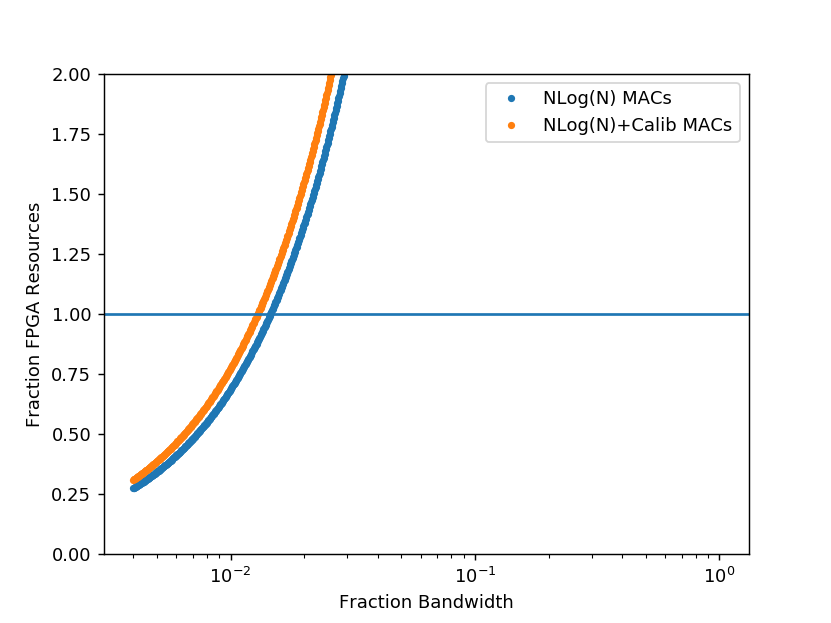

In [21]:
# Virtex UltraScale+
mac = 21897e9
ram = 60e6
io = 80e9

# # Kintex 7 (SNAP)
# mac = 2845e9
# ram = 34e6
# io = 80e9

# N^2 correlator
bw = 250e6
nants = 32000
npols = 2
bits_per_csample = 8
int_time = 10

fq_range = np.logspace(np.log10(1e6),np.log10(250e6),num=1024)
n_2_comp = fq_range * 6 * nants * (2*nants + 1)

# Nlog(N) correlator
nlogn_comp = fq_range * 4 * (4*nants) * np.log(4*nants)

# Nlog(N) + N correlator + calibrator
nlogn_n_comp = (fq_range * 4 * (4*nants) * np.log(4*nants)) + (fq_range * 3 *2*nants * 4)

plt.figure()
plt.ylabel('Fraction FPGA Resources')
plt.xlabel('Fraction Bandwidth')
#plt.plot(fq_range/250e6, n_2_comp/mac, '.', label='N^2 MACs')
plt.semilogx(fq_range/250e6, nlogn_comp/mac, '.', label='NLog(N) MACs')
plt.semilogx(fq_range/250e6, nlogn_n_comp/mac, '.', label='NLog(N)+Calib MACs')
plt.axhline(1)
#plt.axvline(384*250/8192.,color='k')
plt.ylim([0,2])
plt.legend()

## RAM

Naively, the amount of onboard RAM required is proportional to the memory required to store the data required for computation. **Jack says cross correlation products are stored on off-chip memory based on the windowed xengine block**. The documentation for the windowed Xengine is not super clear but Jack says they propose integrating small chunks of high bandwidth data so it can be stored on a low bandwidth, high capacity off-ship memory.

In [19]:
feng_out_datarate = 250 * 3/4. * 8 * 3 * 2 #Mbps
print feng_out_datarate/1e3

9.0


In [21]:
int_datarate = 250 * (3/4.) * (384/6144.) * 8 * 350 * 2 #Mbps
print int_datarate/(16 * 2)

2050.78125


<IPython.core.display.Javascript object>


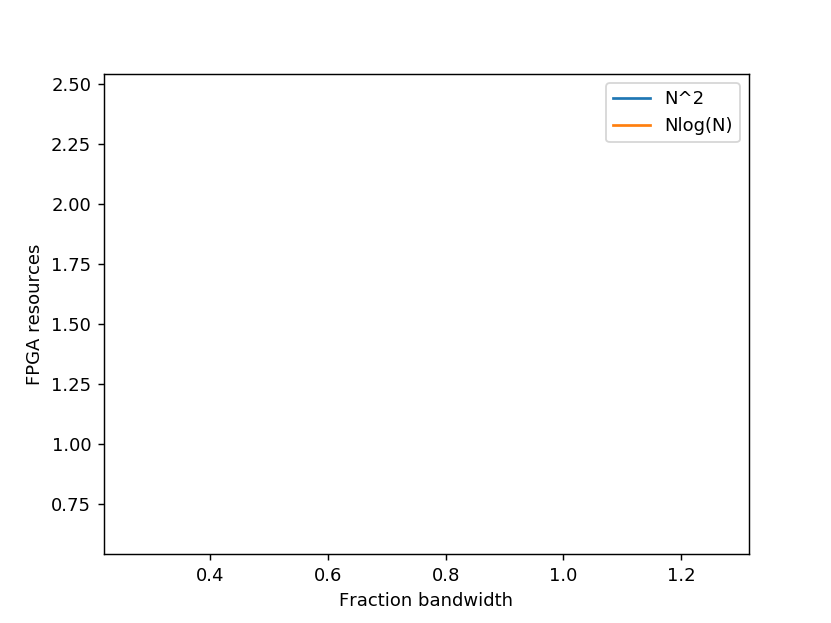

In [26]:
nchans = 820 # 10th of 8192
chans = np.arange(820)

# N^2 correlator in bytes
n_2_ram = (2*nants*) + (2*nants*(2*nants+1)/2 * fq_range*8192./250e6)

# Nlog(N) correlator
# Input data + Unique bl * nchans
nlogn_ram = (2*nants*fq_range*int_time) + (2*nants*fq_range*8192/250e6)


plt.figure()
plt.plot(fq_range/bw, n_2_ram/ram, label='N^2')
plt.plot(fq_range/bw, nlogn_ram/ram, label='Nlog(N)')
plt.ylim([0,2])
plt.ylabel('FPGA resources')
plt.xlabel('Fraction bandwidth')
plt.legend()

In [30]:
(2*nants*fq_range*int_time)

array([7.00000000e+09, 7.03788340e+09, 7.07597182e+09, ...,
       1.73121096e+12, 1.74058013e+12, 1.75000000e+12])

## Input Bandwidth

$$\text{Input Bandwidth} = \text{Frequency BW} \times \text{Nants}\times \text{Npols} \times \text{bits per complex sample} $$

<IPython.core.display.Javascript object>


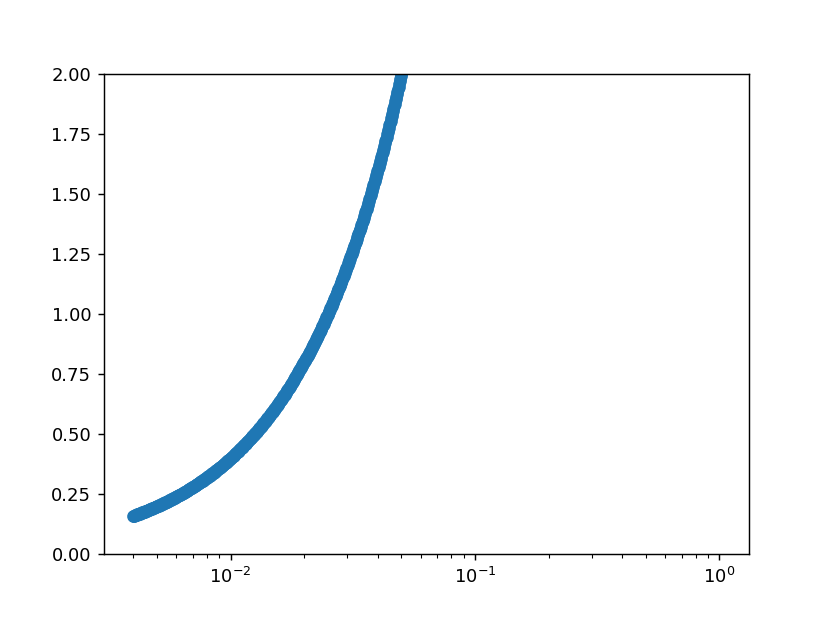

(0, 2)

In [25]:
Ibw_snap2 = 8*400e9

input_bw = fq_range * nants * 2 * 8

plt.figure()
plt.semilogx(fq_range/250e6, input_bw/Ibw_snap2, 'o')
plt.ylim([0,2])

# All Kintex-7 Snap2 resources

<IPython.core.display.Javascript object>


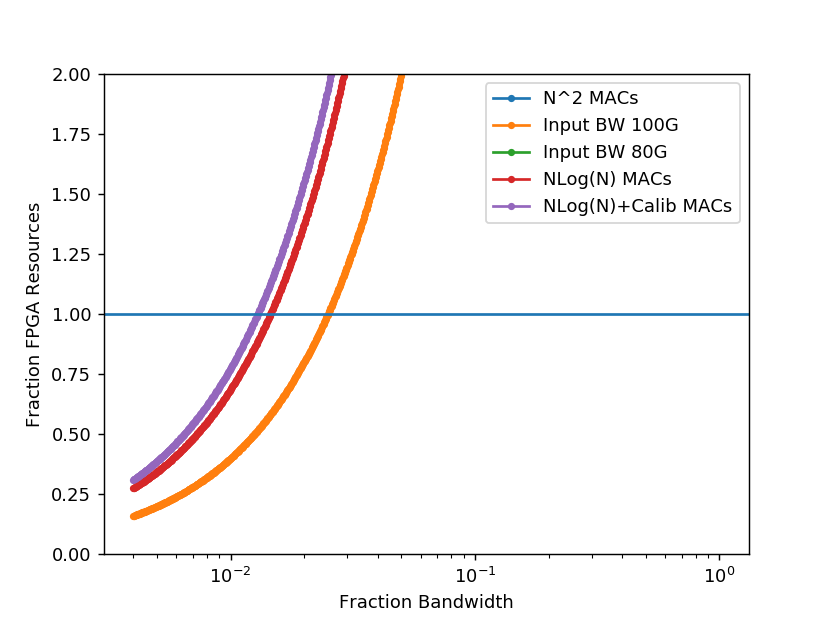

In [26]:
plt.figure()
plt.ylabel('Fraction FPGA Resources')
plt.xlabel('Fraction Bandwidth')
plt.plot(fq_range/250e6, n_2_comp/mac, '.-', label='N^2 MACs')
plt.semilogx(fq_range/250e6, input_bw/Ibw_snap2, '.-', label='Input BW 100G')
plt.semilogx(fq_range/250e6, input_bw/(2*40e9), '.-', label='Input BW 80G')
plt.semilogx(fq_range/250e6, nlogn_comp/mac, '.-', label='NLog(N) MACs')
plt.semilogx(fq_range/250e6, nlogn_n_comp/mac, '.-', label='NLog(N)+Calib MACs')
plt.axhline(1)
#plt.axvline(384*250/8192.,color='k')
plt.ylim([0,2])
plt.legend()

In [19]:
32000*np.log2(32000)

478905.0971091868